## 클러스터링

### 군집화(Clustering)
- 비슷한 것까리 한 그룹으로, 다른 것끼리는 다른 그룹으로 묶음
  - 군집 간 분산(inter-cluster variance) 최대화
  - 군집 내 분산(inner-cluster variance) 최소화
- 정답이 없는 비지도학습(unsupervised learning)

<img src="https://www.imperva.com/blog/wp-content/uploads/sites/9/2017/07/k-means-clustering-on-spherical-data-1v2.png" width=600>

이미지출처: https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/

### 클러스터링의 예
- 고객, 마켓, 브랜드, 사회 경제 활동을 세분화(segmentation)
  - 구매 행동에 따른 고객 그룹화
  - 고객 데이터에서 연관성 식별하여 고객 그룹화
  - 구매 내역별로 데이터 그룹화
  - 제조 및 판매 측정으로 재고 그룹화
- 다양한 관심사에 따른 사람 그룹화
- 이상 검출(Abnormaly detection)

## K-평균(K-means)
- 비슷한 특성을 지닌 데이터들끼리 묶어 K개의 군집(cluster)으로 묶음.
- K는 묶을 군집(cluster)의 개수를 의미함.
- 평균(means)는 각 군집의 중심과 데이터들의 평균 거리를 의미함. 각 군집의 평균(mean)을 활용하여 비슷한 특성끼리 묶음.
- 비지도학습(Unupervised Learning)이며, 비계층적 군집분석(Non-Hierarchical Clustering)임.
- 유사한 데이터는 중심점(centroid)을 기반으로 분포할 것이라는 가정을 기반으로 출발하는 중심기반 군집분석(Center-based Clustering)임

- n개의 데이터와 K(<=n)개의 중심점(centroid)이 주어졌을 때, 각 군집(cluster) 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트를 하며 그룹화를 수행함.
<img src='https://github.com/sohicode/ai_basics/blob/main/img/kmeans1.png?raw=true'>
- 이상치(outlier)에 취약함
<img src='https://github.com/sohicode/ai_basics/blob/main/img/kmeans2.png?raw=true'>

이미지 출처: http://ai-times.tistory.com/158

<img src='https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif'>

이미지 출처: https://velog.io/@soyeon207/클러스터링군집화-알고리즘


### 붓꽃 데이터

#### [code] iris dataset
- 꽃잎(petal) 크기, 꽃받침(sepal) 크기

<img src='https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png' width=300>
이미지 출처: https://www.integratedots.com/determine-number-of-iris-species-with-k-means/

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

iris = load_iris()

iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                   iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


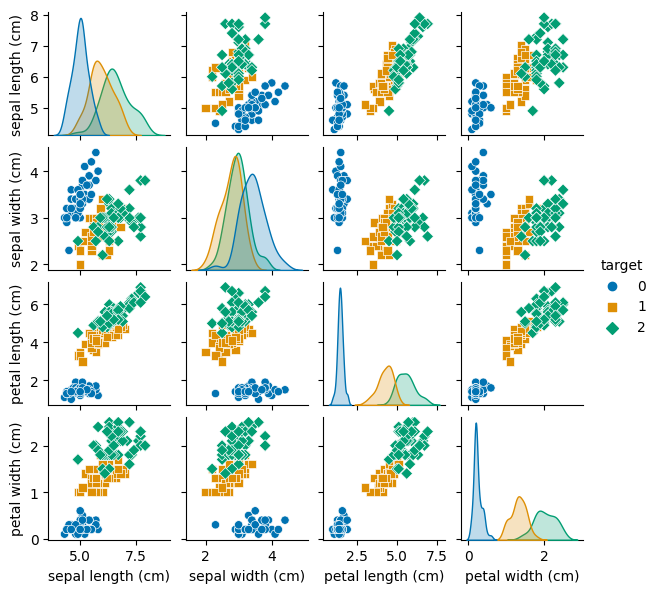

In [ ]:
# sns.pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그림
# 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그림
sns.pairplot(iris_df, hue='target', markers=['o', 's', 'D'], palette='colorblind', height=1.5)

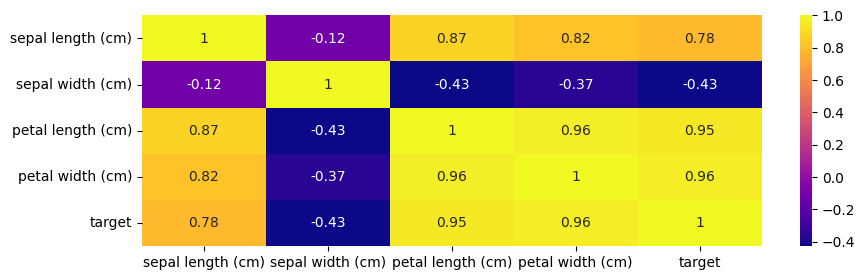

In [ ]:
plt.figure(figsize = (10,3))
sns.heatmap(iris_df.corr(), annot = True, cmap='plasma');

#### [code] sklearn K-means 분류 예측 - 꽃잎(petal)을 기준으로 분류

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

# 데이터
iris = load_iris()
X = iris.data[:, 2:4]

# 모델
K = 3
seed = 420
# n_clusters: K-means의 K를 의미하는 군집형성의 개수임
# init: 초기 중심점을 'random;은 임의의 값으로 설정하고, 'k-means++'은 멀리 떨어진 중심점으로 설정함.
# n_init: 초기 중심위치 시도 횟수로 'auto' 또는 int값으로 설정함. 기본 값은 10개의 중심점을 설정하고, 이 중 좋은 것으로 선택함.
# random_state: 난수 고정함. 학습결과의 동일성을 위함.
kmeans = KMeans(n_clusters= K, init='random', n_init='auto', random_state=seed)

# 학습
kmeans.fit(X)

# 결과
print('중심점(cluster centers):', kmeans.cluster_centers_)
print('레이블(label):', kmeans.labels_)
print('응집도(inertia):', kmeans.inertia_)
print('반복 실행 횟수(n_iter):', kmeans.n_iter_)

중심점(cluster centers): [[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]
레이블(label): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
응집도(inertia): 31.37135897435897
반복 실행 횟수(n_iter): 5


#### [code] sklearn K-means 분류 예측 - 그래프 확인

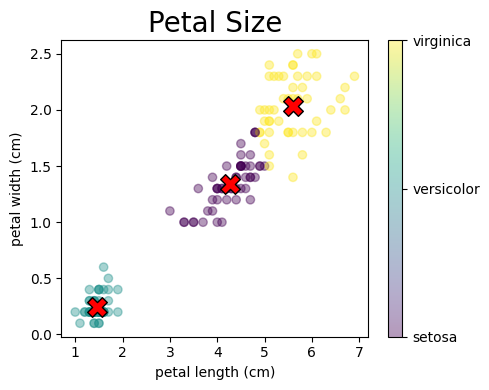

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=kmeans.labels_, alpha=0.4)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Petal Size', fontsize=20)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# 중심점 표시
for xn in kmeans.cluster_centers_:
  #print(xn)
  plt.scatter(xn[0], xn[1], marker='X', c='red', s=200, linewidths=1, edgecolors='black')

plt.tight_layout()
plt.show()

### K-means 알고리즘
- K-means 알고리즘이란?
  - n개의 데이터와 K(<=n)개의 중심점(centroid)이 주어졌을 때, 각 군집(cluster) 내의 데이터와 중심점 간의 비용(거리)을 최소화하는 방향으로 계속 업데이트를 하며 그룹화를 수행함.

- K-means 알고리즘 절차
  0. 하이퍼파라미터를 결정함
    - 1) 군집의 개수인 K를 선택함: 몇 개의 군집으로 군집화할지 사람이 결정
    - 2) 초기 중심점(centroid) 설정 방법 선택함
    - cf) https://docs.aws.amazon.com/ko_kr/sagemaker/latest/dg/k-means-api-config.html
  1. 초기 중심점(centroid) 설정
    - 데이터셋에서 무작위로 균등하게 K 개의 중심점(centroid)을 선택함
    - 1) Randomly select
    - 3) K-means++
  2. 데이터와 중심점 사이 거리 계산
    - 유클리디안 거리를 활용해서 각 데이터 지점과 중심점 사이의 거리를 계산함
  3. 데이터를 군집에 할당(배정)
    - 각 데이터들을 가장 가까운 중심점(centroid)이 속한 그룹으로 지정함
  4. 각 군집 별 데이터의 평균 계산
    - 정해진 class에 해당하는 data point를 이용해서 그 class의 평균을 구함
  5. 중심점 재설정(갱신)
    - 할당된 결과를 통해서 중심점(centroid)을 재설정함
  6. 데이터를 군집에 재할당(배정)
    - 중심점(centroid)의 값이 변하지 않을때까지 2~3번 과정을 반복함

cf) 링크 참조 https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

- 파라미터의 종류
  - 파라미터(Parameter) - 모델 내부에서 결정되거나 데이터에 의해 값이 결정.
  - 하이퍼파라미터(Hyperparameters) - 사용자가 직접 결정.

#### [code] K-means 알고리즘 numpy로 구현

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np

# 데이터
iris = load_iris()
X = iris.data[:, :2]

# 0. 하이퍼파라미터를 결정함
K = 3

In [ ]:
# 1. 초기 중심점(centroid) 설정
min_x = X[:,0].min()
max_x = X[:,0].max()
min_y = X[:,1].min()
max_y = X[:,1].max()

np.random.seed(2012)
center_x = np.random.uniform(low=min_x, high=max_x, size=K).reshape(-1, 1)
center_y = np.random.uniform(low=min_y, high=max_y, size=K).reshape(-1, 1)
centroids = np.concatenate([center_x, center_y], axis=-1)

print(center_x)
print(center_y)
print(centroids)

[[4.55670923]
 [5.66047534]
 [5.19306855]]
[[3.04372362]
 [3.49069303]
 [4.32683678]]
[[4.55670923 3.04372362]
 [5.66047534 3.49069303]
 [5.19306855 4.32683678]]


In [ ]:
# data가 속하는 cluster를 저장할 리스트 초기화
num_data = X.shape[0]
cluster_list = np.zeros((num_data)) # 각 점 별 군집

print(num_data)
print(cluster_list)

150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


class means 0 [4.82352941 3.02352941]
class means 1 [6.2037037  2.99907407]
class means 2 [5.3125 3.9875]


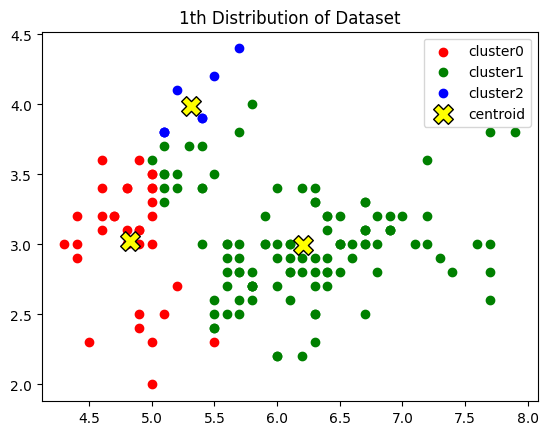

class means 0 [4.92439024 2.9804878 ]
class means 1 [6.4        2.92727273]
class means 2 [5.3047619  3.75238095]


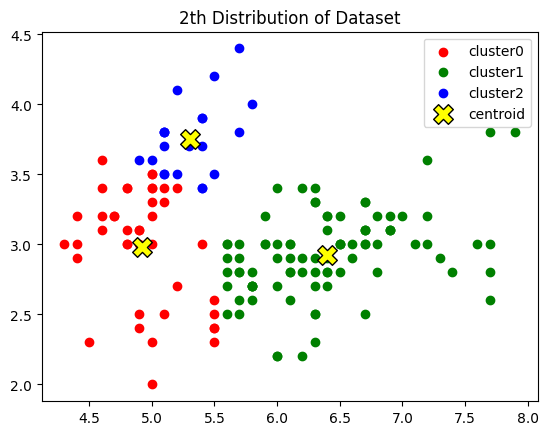

class means 0 [5.00465116 2.91395349]
class means 1 [6.45853659 2.93536585]
class means 2 [5.268 3.704]


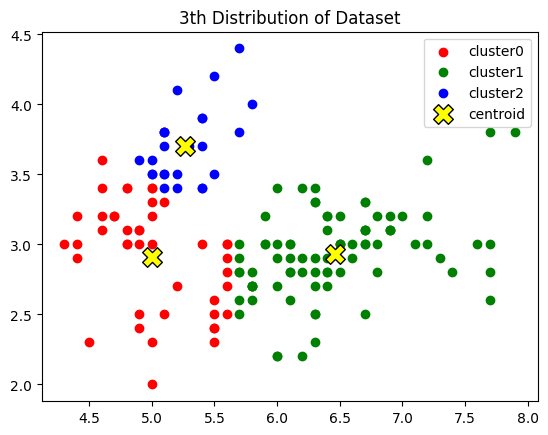

class means 0 [5.10434783 2.85869565]
class means 1 [6.51842105 2.94868421]
class means 2 [5.225      3.67857143]


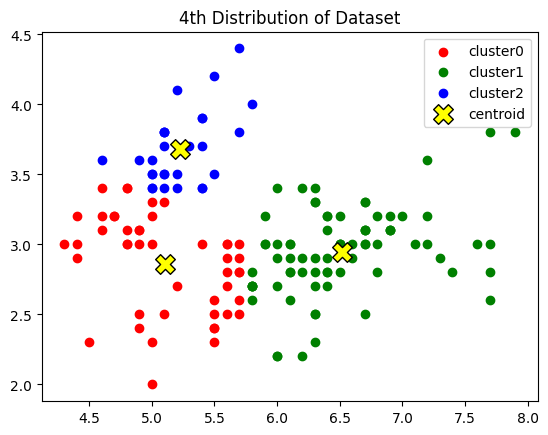

class means 0 [5.21914894 2.78510638]
class means 1 [6.58 2.97]
class means 2 [5.16969697 3.63030303]


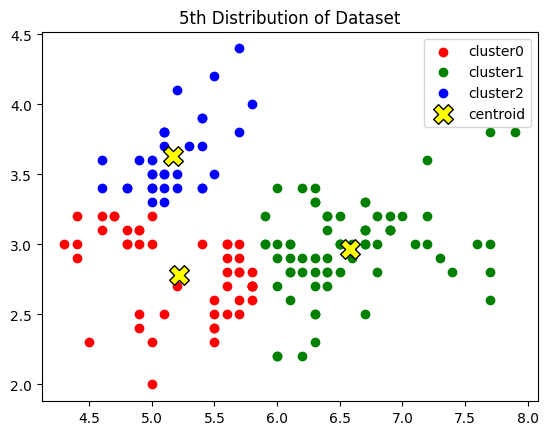

class means 0 [5.28333333 2.73571429]
class means 1 [6.58 2.97]
class means 2 [5.10526316 3.57368421]


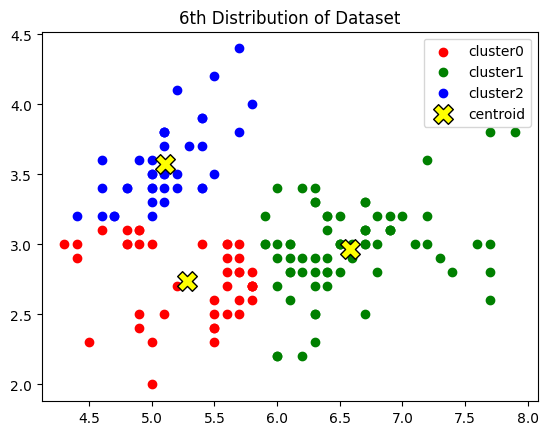

class means 0 [5.445  2.6725]
class means 1 [6.61818182 2.99242424]
class means 2 [5.04318182 3.50454545]


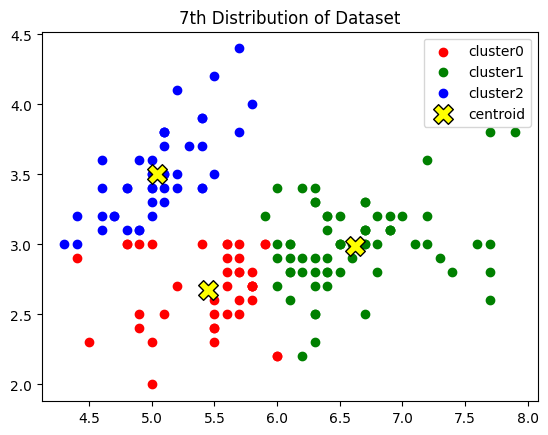

class means 0 [5.58974359 2.64102564]
class means 1 [6.65645161 3.00806452]
class means 2 [5.01632653 3.45102041]


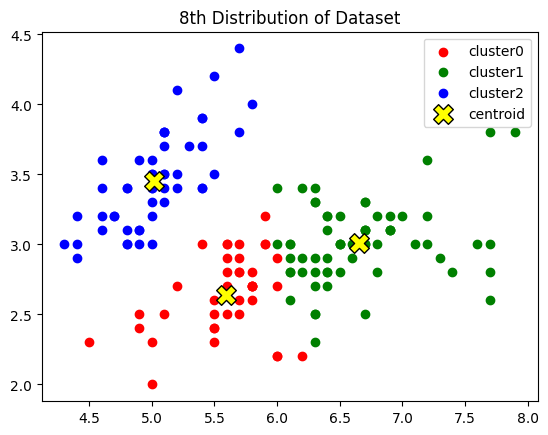

class means 0 [5.65       2.64772727]
class means 1 [6.70350877 3.03508772]
class means 2 [5.01632653 3.45102041]


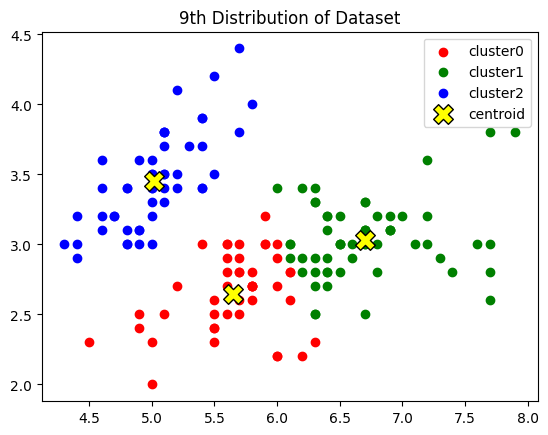

class means 0 [5.70408163 2.66122449]
class means 1 [6.75384615 3.05961538]
class means 2 [5.01632653 3.45102041]


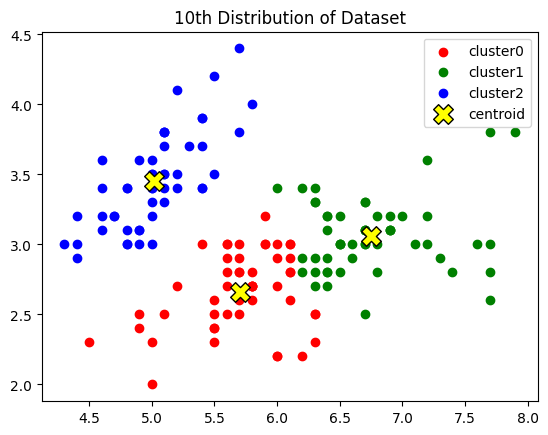

class means 0 [5.72884615 2.68269231]
class means 1 [6.79183673 3.06122449]
class means 2 [5.01632653 3.45102041]


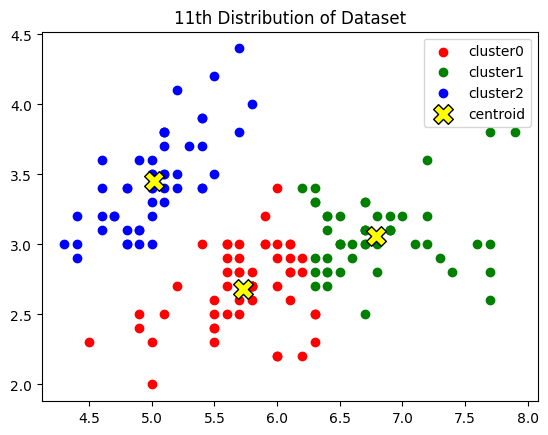

class means 0 [5.76346154 2.69038462]
class means 1 [6.80208333 3.06875   ]
class means 2 [5.006 3.428]


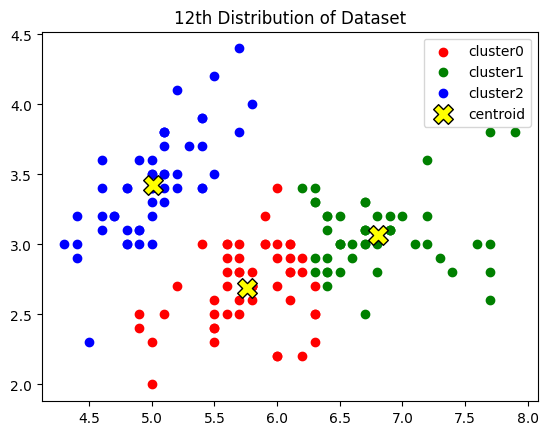

class means 0 [5.77358491 2.69245283]
class means 1 [6.81276596 3.07446809]
class means 2 [5.006 3.428]


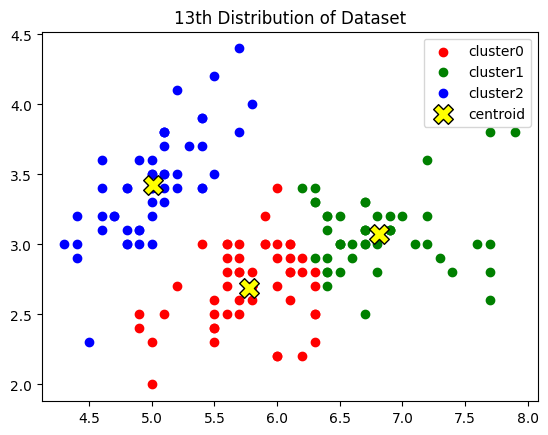

class means 0 [5.77358491 2.69245283]
class means 1 [6.81276596 3.07446809]
class means 2 [5.006 3.428]


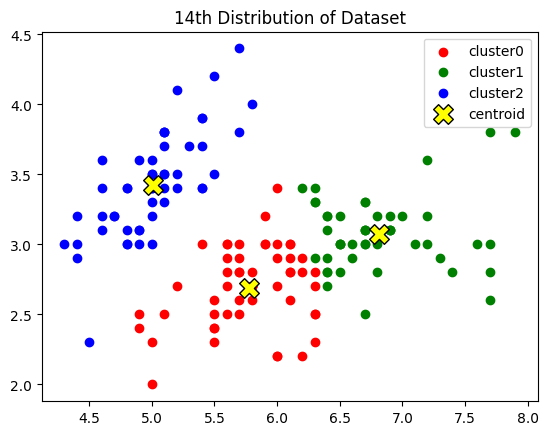

In [ ]:
counter = 0
while True:
  counter = counter + 1

  prev_cluster_list = cluster_list

  # 2. 데이터와 중심점 사이 거리 계산
  # cluster center에 대해서 data point와의 거리(유클리디안 거리)를 계산
  # shape(3, 150, 2) = shape(3, 1, 2) - shape(1, 150, 2)
  diff_mat = (centroids.reshape(-1, 1, 2) - X.reshape(1, -1, 2))

  # shape(3, 150)
  dists = np.sqrt((diff_mat**2).sum(axis=-1))
  #print('데이터와 중심점 사이의 거리:', dists)

  # 3. 데이터를 군집에 할당(배정)
  # 각 데이터들을 가장 가까운 중심점(centroid)이 속한 그룹으로 지정함
  # 거리가 가장 짧은 cluster의 class로 배정함.
  # shape(150,)
  cluster_list = dists.argmin(axis=0)
  #print('데이터가 속한 cluster 목록:', cluster_list)


  # 4. 각 군집 별 데이터의 평균 계산
  # 정해진 class에 해당하는 data point를 이용해서 그 class의 평균을 구함
  for i in range(K):
    #shape(2,) = shape(-1, 2)
    cluster_data_mean = X[cluster_list==i].mean(axis=0)
    print('class means', i, cluster_data_mean)

  # 5. 군집의 중심점(cluster center)을 재설정(업데이트)
  # 다시 계산한 군집의 중심점으로 재설정함.
    centroids[i] = cluster_data_mean


  # 그래프 그리기
  plt.title("{}th Distribution of Dataset".format(counter))
  for idx, color in enumerate(['r','g','b']):
    mask = (cluster_list==idx)
    plt.scatter(X[mask, 0], X[mask, 1],
                label='cluster'+str(idx), c=color)
  plt.scatter(centroids[:, 0], centroids[:, 1], label="centroid",
              s=200, marker='X', linewidths=1, edgecolors='black', c='yellow')
  plt.legend()
  plt.show()

  # 6. 데이터를 군집에 재할당(배정)

  # 중심점(centroid)의 값이 변하지 않고 그대로면 종료
  if np.all(prev_cluster_list == cluster_list):
    break # 종료
  # 중심점(centroid)의 값이 변하면 군집을 재할당하는 과정(2~5)을 반복함

## K의 값 결정
- K값(# of cluster)
  - 하이퍼파라미터 값인 K를 선택
  - K는 군집(cluster) 개수
- K값의 선택방법(Elbow Method)
  - WCSS(Within CLusters Sum of Squares)를 이용함
  - 뾰족하게 구부러진 부분이나 특정 지점이 팔처럼 굽어지는 부분이 Optimal number of clusters임. 이 값을 K값으로 결정.

  <img src='https://blog.kakaocdn.net/dn/dPcxxj/btqQpsyhUKN/E2LMrVG9g9kvnckNOHR6GK/img.png'>

이미지 출처: https://nicola-ml.tistory.com/66



#### [code] 적정 K값 선택
코드 출처: https://blog.naver.com/PostView.naver?blogId=applewoods&logNo=222437821195&parentCategoryNo=&categoryNo=60&viewDate=&isShowPopularPosts=true&from=search

Text(0, 0.5, 'WCSS(Within Clusters Sum of Squares)')

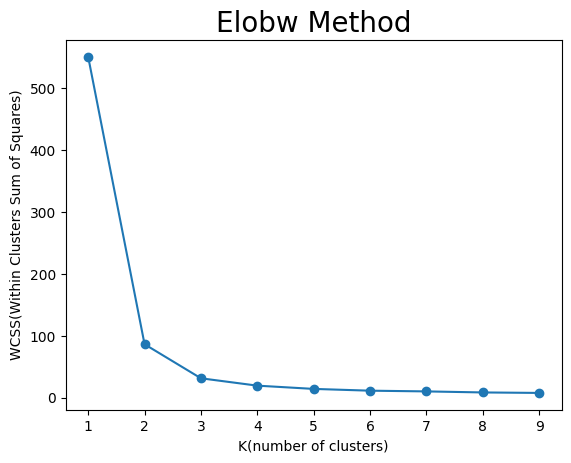

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

inertia_list = []
K_range = range(1, 10)

seed = 420
for K in K_range:
    kmeans = KMeans(n_clusters= K, init='random', n_init='auto', random_state=seed)
    kmeans.fit(X)

    # 응집도(sample과 cluster 중심점 간의 거리 제곱의 합)를 리스트에 추가하기
    inertia_list.append(kmeans.inertia_)

# Elbow Method 그래프 그리기
plt.plot(K_range, inertia_list, marker= 'o')
plt.title('Elbow Method', fontsize=20)
plt.xlabel('K(number of clusters)')
plt.ylabel('WCSS(Within Clusters Sum of Squares)')

## ML Clustering

### ML Clustering Algorithms
- 비계층적 군집분석(Non-Hierarchical Clustering)
  - 중심 기반(Center-based): K-means
  - 밀도 기반(Density-based): DBSCAN
- 계층적 군집분석(Hierarchical Clustering)
  - 통합 계층적 클러스터링(Agglomerative Hierarchical Clustering)

- DBSCAN
  - 밀도에 따라 클러스터링 하는 알고리즘
  - 데이터 포인트의 밀집 영역을 찾으려고 하는 sliding-window 기반 알고리즘

  <img src='https://miro.medium.com/max/1350/1*tc8UF-h0nQqUfLC8-0uInQ.gif'>

- Agglomerative Hierarchical Clustering
  - 클러스터의 계층은 나무(혹은 dendrogram)로 표현하는 알고리즘
  - 나무의 뿌리는 모든 샘플을 모아 놓은 unique한 클러스터이고 잎은 하나의 샘플을 갖는 클러스터가 됨

  <img src='https://miro.medium.com/max/1400/1*ET8kCcPpr893vNZFs8j4xg.gif'>


이미지 출처: https://velog.io/@soyeon207/클러스터링군집화-알고리즘

### scikit-learn clustering algorithm

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'>

이미지 출처: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py


## Reference
- Numpy을 활용한 머신러닝 구현 - K-Means 군집
  - https://github.com/public-ai/dl-lecture/blob/master/ml-homework/2_Numpy%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20-%20K-means%20%EA%B5%B0%EC%A7%91%ED%99%94.ipynb
- 김성범 인공지능 연구소 - 파이썬 실습 군집분석
  - https://github.com/DMQA/Python-codes-for-machine-learning-algorithms/blob/main/12.%20%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%8B%A4%EC%8A%B5_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb
- K-means 알고리즘 원리 확인하기
  - https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
- Iris 데이터로 K-means Clustering(K-평균 군집화) 하기
  - https://blog.naver.com/PostView.naver?blogId=applewoods&logNo=222437821195&parentCategoryNo=&categoryNo=60&viewDate=&isShowPopularPosts=true&from=search